<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-16 06:31:54--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-16 06:31:54--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-16 06:31:54--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

## 10-1

In [4]:
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"임의로 던진 다트의 x 좌표는 {x:.2f}입니다.")
print(f"임의로 던진 다트의 y 좌표는 {y:.2f}입니다.")

임의로 던진 다트의 x 좌표는 2.49입니다.
임의로 던진 다트의 y 좌표는 0.57입니다.


## 10-2

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


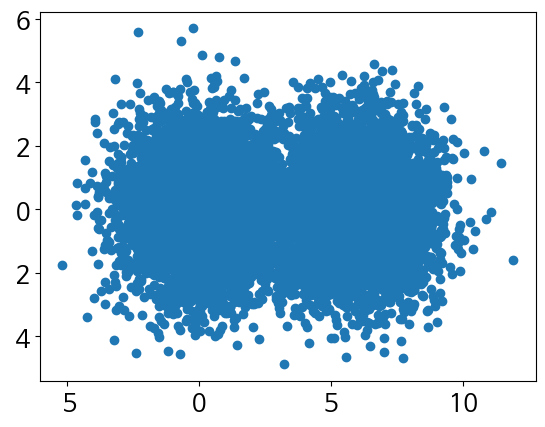

In [5]:
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)
plt.scatter(x_coordinates, y_coordinates)
plt.show()

## 10-3

In [6]:
from scipy.spatial.distance import euclidean

def nearest_bulls_eye(dart):
    distance = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distance)

darts = [[0,1], [6,1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"위치 {dart}의 다트는 {index} 번째 과녁에 가장 가깝습니다")

위치 [0, 1]의 다트는 0 번째 과녁에 가장 가깝습니다
위치 [6, 1]의 다트는 1 번째 과녁에 가장 가깝습니다


## 10-4

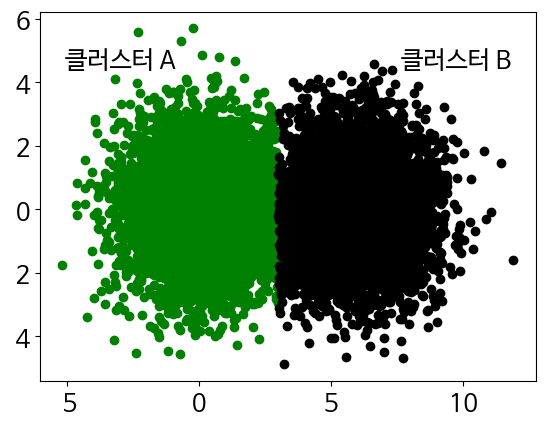

In [7]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                        if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                 color=['g', 'k'][bs_index])

    # Adding the text annotations
    plt.text(0.05, 0.9, '클러스터 A', transform=plt.gca().transAxes,
             fontsize=18, verticalalignment='top', horizontalalignment='left')
    plt.text(0.95, 0.9, '클러스터 B', transform=plt.gca().transAxes,
             fontsize=18, verticalalignment='top', horizontalalignment='right')

    plt.show()

darts = [[x_coordinates[i], y_coordinates[i]]
       for i in range(len(x_coordinates))]
color_by_cluster(darts)

## 10-5

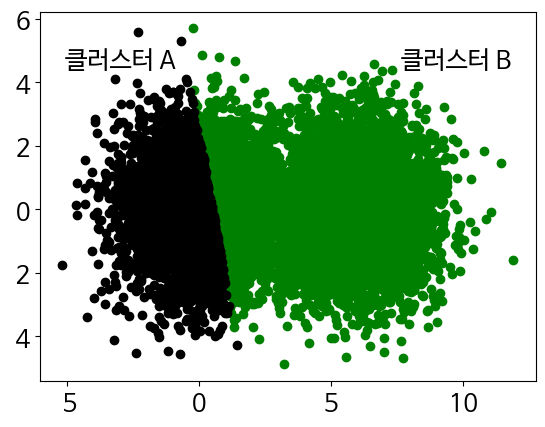

In [8]:
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

## 10 -6

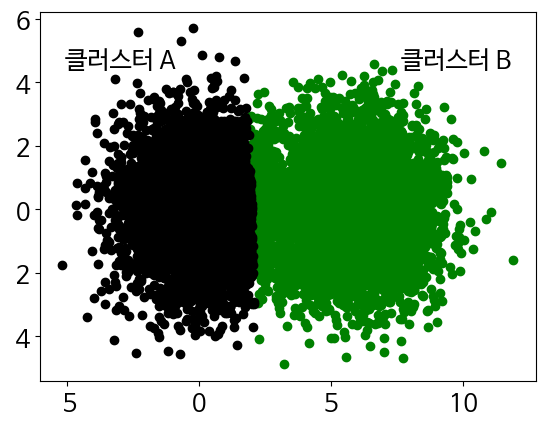

In [9]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                        if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)
    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

## 10-7

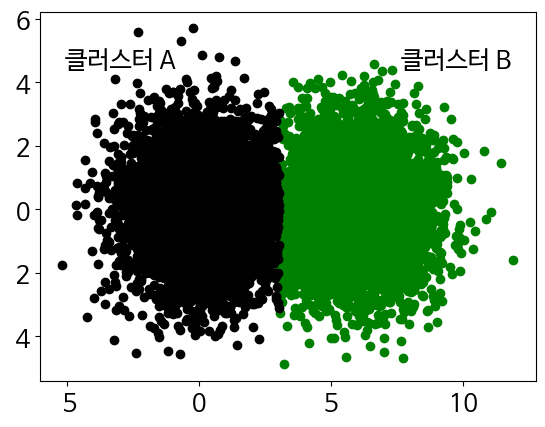

In [10]:
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

## 10-8

In [11]:
from sklearn.cluster import KMeans

## 10-9

In [12]:
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("과녁 할당")
print(assigned_bulls_eyes)

과녁 할당
[0 0 0 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 10-10

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


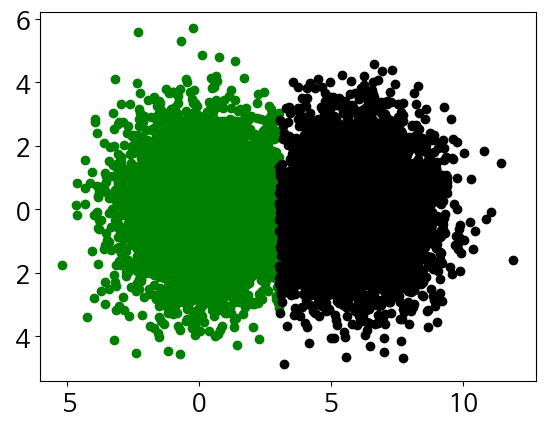

In [13]:
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts))
                    if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates,
             color=['g', 'k'][bs_index])
plt.show()

## 10-11

In [14]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"{dart} 위치의 다트는 {bulls_eye_index}번 과녁에 가장 가깝습니다")

[500, 500] 위치의 다트는 1번 과녁에 가장 가깝습니다
[-500, -500] 위치의 다트는 0번 과녁에 가장 가깝습니다


## 10-12

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

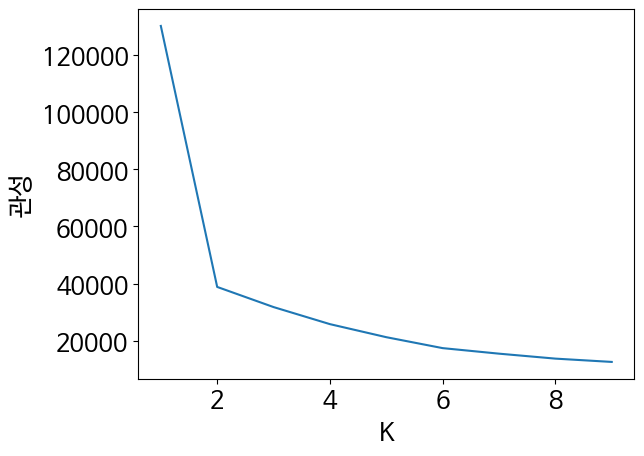

In [15]:
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('관성')
plt.show()

## 10-13

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

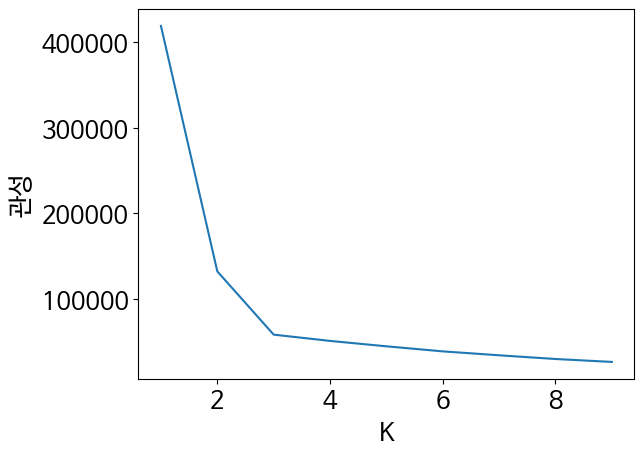

In [16]:
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('관성')
plt.show()

## 10-14

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


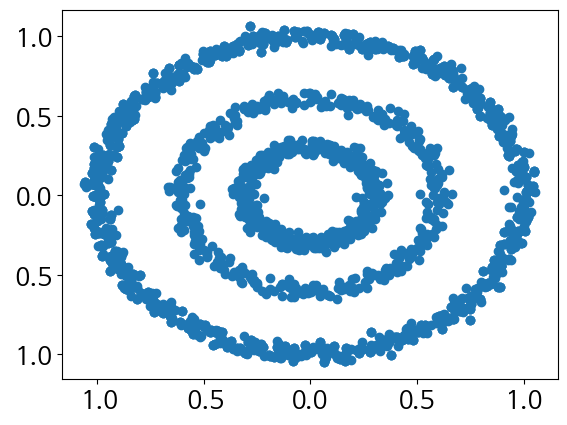

In [17]:
from sklearn.datasets import make_circles

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, 0.99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor,
                             noise=.03, random_state=1)
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

## 10-15

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


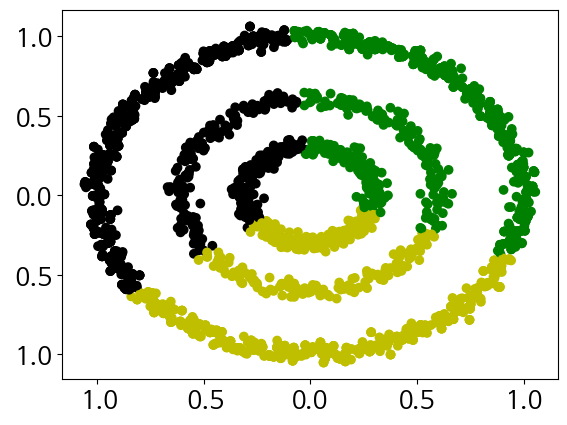

In [19]:
rocks = [[x_coordinates[i], y_coordinates[i]]
        for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

## 10-16

In [20]:
epsilon = 0.1
min_points = 10

## 10-17

In [21]:
neighbor_indices = [i for i, rock in enumerate(rocks[1:])
                   if euclidean(rocks[0], rock) <= epsilon]

## 10-18

In [22]:
num_neighbors = len(neighbor_indices)
print(f"0번째 암석에는 {num_neighbors}개의 이웃이 있습니다.")

if num_neighbors >= min_points:
    print("밀집 지역에 속합니다.")
else:
    print("밀집 지역에 속하지 않습니다.")

0번째 암석에는 40개의 이웃이 있습니다.
밀집 지역에 속합니다.


## 10-19

In [23]:
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"{dense_cluster_size} 개의 암석을 포함하는 밀집 클러스터를 찾았습니다")

41 개의 암석을 포함하는 밀집 클러스터를 찾았습니다


## 10-20

In [24]:
dense_region_indices = set(dense_region_indices)
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks)
                             if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)

dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"{dense_cluster_size}개의 암석을 포함하도록 클러스터를 확장했습니다")

781개의 암석을 포함하도록 클러스터를 확장했습니다


## 10-21

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


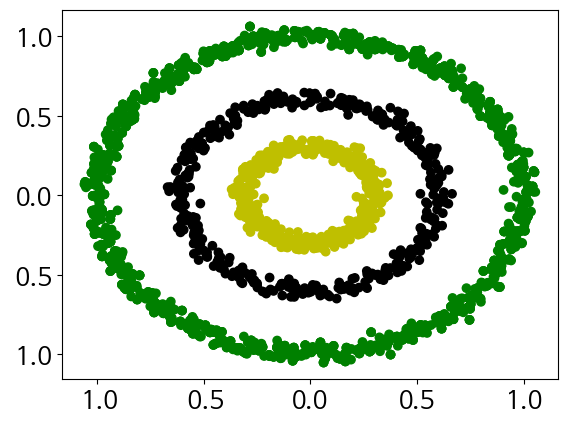

In [25]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

## 10-22

In [26]:
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon,
                  min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

## 10-23

In [27]:
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return 0.17 * num_blocks

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y)

print(f"맨해튼 거리는 {distance} 마일입니다")

맨해튼 거리는 4.42 마일입니다


## 10-24

0 번째 데이터 점은 0번 클러스터에 속합니다 
1 번째 데이터 점은 0번 클러스터에 속합니다 
2 번째 데이터 점은 0번 클러스터에 속합니다 
3 번째 데이터 점은 이상치입니다
4 번째 데이터 점은 이상치입니다


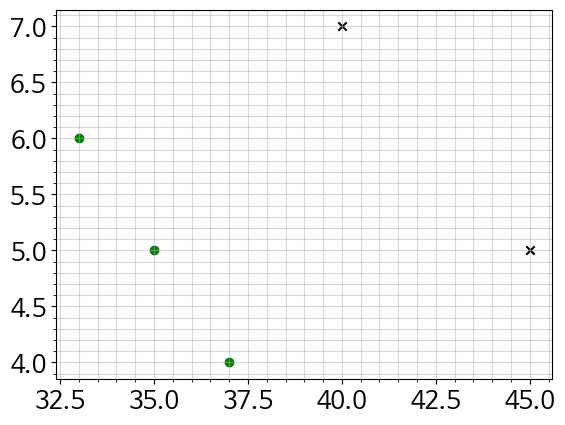

In [28]:
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3,
                  metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{i} 번째 데이터 점은 이상치입니다")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"{i} 번째 데이터 점은 {cluster}번 클러스터에 속합니다 ")
        plt.scatter(point[0], point[1], color='g')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

plt.show()

## 10-25

In [29]:
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all():
        return 0
    elif is_negative_a.any() or is_negative_b.any():
        return 10
    else:
        return 2

points = [[-1, -1], [-10, -10], [-1000, -13435], [3,5], [5,-7]]
clusters = DBSCAN(eps=.1, min_samples=2,
                  metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"점 {point}는 이상치 입니다")
    else:
        print(f"점 {point}는 클러스터 {cluster}에 속합니다")

점 [-1, -1]는 클러스터 0에 속합니다
점 [-10, -10]는 클러스터 0에 속합니다
점 [-1000, -13435]는 클러스터 0에 속합니다
점 [3, 5]는 이상치 입니다
점 [5, -7]는 이상치 입니다


## 10-26

In [30]:
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates,
                   'Cluster': rock_clusters})

## 10-27

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


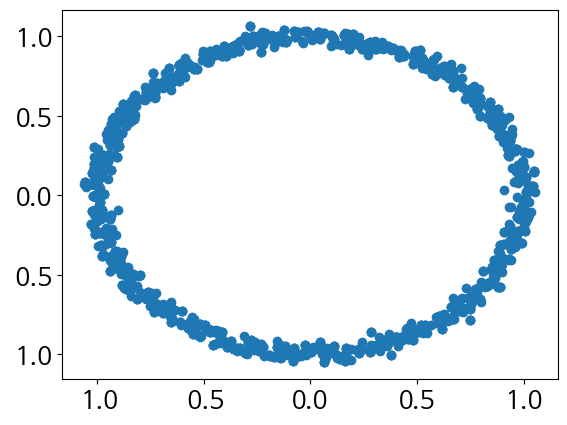

In [31]:
df_cluster = df[df.Cluster == 0]
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

## 10-28

0번 클러스터는 건너뜁니다
1번 클러스터를 시각화 합니다
2번 클러스터를 시각화 합니다


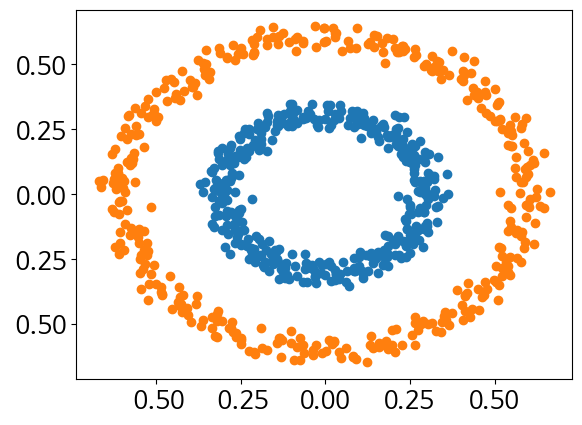

In [32]:
for cluster_id, df_cluster in df.groupby('Cluster'):
    if cluster_id == 0:
        print(f"{cluster_id}번 클러스터는 건너뜁니다")
        continue
    print(f"{cluster_id}번 클러스터를 시각화 합니다")
    plt.scatter(df_cluster.X, df_cluster.Y)

plt.show()